In [12]:
import neurokit2 as nk
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import numpy as np
import os as os

from neurokit2.misc import NeuroKitWarning
from neurokit2.signal.signal_rate import _signal_rate_plot
from neurokit2.ecg.ecg_peaks import _ecg_peaks_plot
from neurokit2.ecg.ecg_segment import ecg_segment

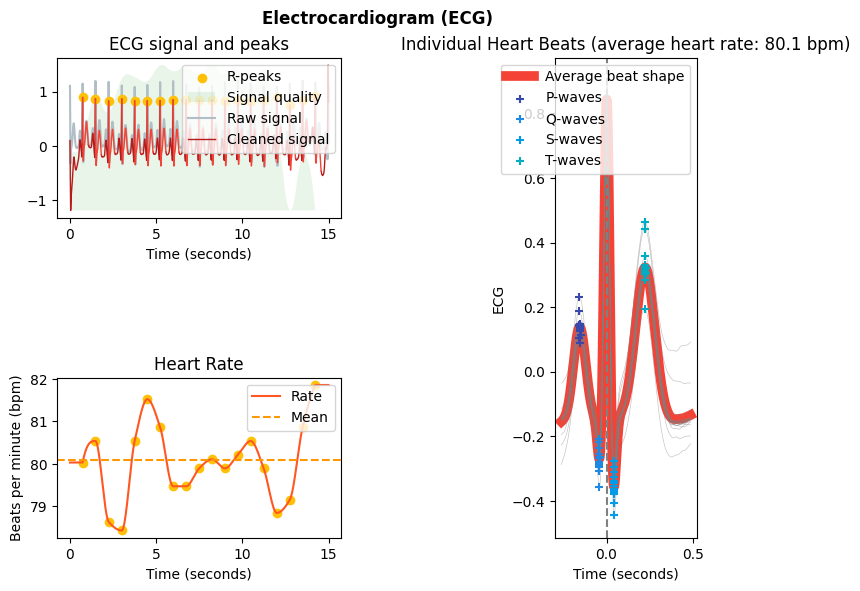

In [13]:
# Simulated ECG data : process and visualize 
ecg = nk.ecg_simulate(duration=15, sampling_rate=1000, heart_rate=80)
signals, info = nk.ecg_process(ecg, sampling_rate=1000)

nk.ecg_plot(signals, info)

# modify properties of the graphics object
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=1, 
                    hspace=1)
fig = plt.gcf() 
fig.set_size_inches(8, 6)


In [14]:
# Recorded ECG data : process and visualize 
csv_file_path = 'C:/Users/seinj/Teaching/Recordings_2023_EMG-ECG/csv-data/pb_04_elevated_ecg.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path, header=None, names=['Column1'], skiprows=1)

# Extract the single column as a vector
ecg_data = df['Column1'].values
print(ecg_data[10000:10100])

[ 0.132       0.141       0.141       0.14399999  0.146       0.152
  0.155       0.15800001  0.161       0.164       0.164       0.167
  0.164       0.17        0.17        0.167       0.164       0.161
  0.149       0.146       0.146       0.146       0.14399999  0.14399999
  0.141       0.141       0.138       0.132       0.12899999  0.12899999
  0.126       0.12        0.117       0.117       0.111       0.108
  0.105       0.103       0.103       0.1         0.097       0.1
  0.097       0.091       0.085       0.082       0.079       0.073
  0.067       0.062       0.056       0.053       0.05        0.053
  0.05        0.05        0.05        0.044       0.05        0.05
  0.044       0.041       0.035       0.032       0.026       0.026
  0.026       0.021       0.021       0.021       0.018       0.015
  0.015       0.021       0.021       0.023       0.026       0.026
  0.026       0.021       0.015       0.009       0.003      -0.003
 -0.009      -0.012      -0.018      -0.0

In [15]:
# process a small time window
signals_cropped, info = nk.ecg_process(ecg_data[50000:57000], sampling_rate=1000)
display(signals_cropped)

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,-0.026,0.000802,72.420036,0.660199,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,-0.026,0.001826,72.420036,0.660199,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,-0.026,0.002841,72.420036,0.660199,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,-0.026,0.003822,72.420036,0.660199,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,-0.023,0.004745,72.420036,0.660199,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,-0.015,0.003351,79.365079,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
6996,-0.015,0.002998,79.365079,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
6997,-0.015,0.002581,79.365079,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
6998,-0.012,0.002120,79.365079,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0


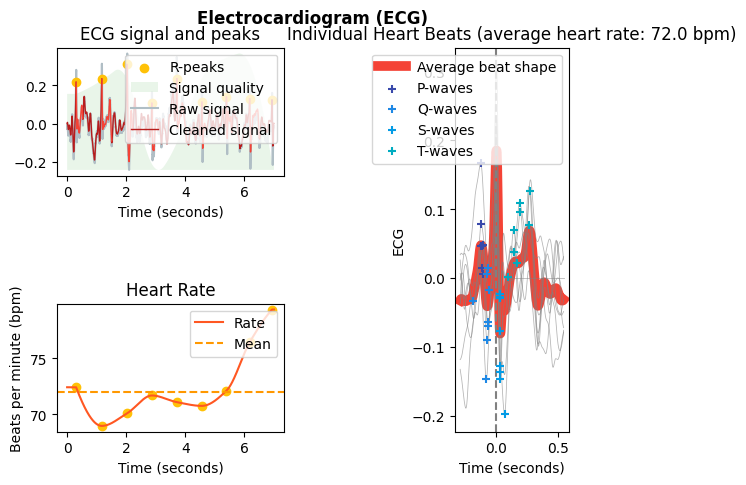

In [16]:
# plot results
nk.ecg_plot(signals_cropped, info)

# modify properties of the graphics object
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=1, 
                    hspace=1)
fig.set_size_inches(8, 6)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

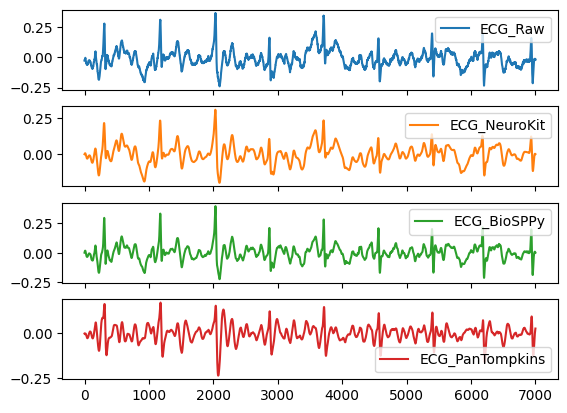

In [17]:
# try it out step by step
cleaned = nk.ecg_clean(ecg_data[50000:57000], sampling_rate=1000)

# try different cleaning methods
# https://neuropsychology.github.io/NeuroKit/_modules/neurokit2/ecg/ecg_clean.html#ecg_clean
signals = pd.DataFrame({
    "ECG_Raw" : ecg_data[50000:57000],
    "ECG_NeuroKit" : nk.ecg_clean(ecg_data[50000:57000], sampling_rate=1000, method="neurokit"),
    "ECG_BioSPPy" : nk.ecg_clean(ecg_data[50000:57000], sampling_rate=1000, method="biosppy"),
    "ECG_PanTompkins" : nk.ecg_clean(ecg_data[50000:57000], sampling_rate=1000, method="pantompkins1985"),
   # "ECG_Hamilton" : nk.ecg_clean(ecg_data[50000:57000], sampling_rate=1000, method="hamilton2002"),
   # "ECG_Elgendi" : nk.ecg_clean(ecg_data[50000:57000], sampling_rate=1000, method="elgendi2010"),
   # "ECG_EngZeeMod" : nk.ecg_clean(ecg_data[50000:57000], sampling_rate=1000, method="engzeemod2012"),
   # "ECG_TC" : nk.ecg_clean(ecg_data[50000:57000], sampling_rate=1000, method="templateconvolution")
})

signals.plot(subplots=True)

In [18]:
# process the full time window
signals_full, info = nk.ecg_process(ecg_data, sampling_rate=1000)

In [19]:
# select segment to plot 
ecg_signals = signals_full[60000:70000]

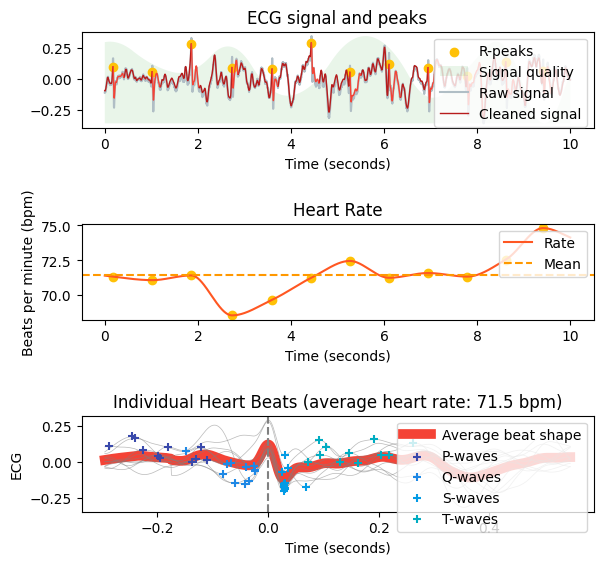

In [20]:
# Following is modification of ecg_plot()
# https://neuropsychology.github.io/NeuroKit/_modules/neurokit2/ecg/ecg_plot.html#ecg_plot

# Extract R-peaks (take those from df as it might have been cropped)
if "ECG_R_Peaks" in ecg_signals.columns:
    info["ECG_R_Peaks"] = np.where(ecg_signals["ECG_R_Peaks"] == 1)[0]

# Prepare figure and set axes.
gs = matplotlib.gridspec.GridSpec(2, 2, width_ratios=[2 / 3, 1 / 3])

fig = plt.figure(constrained_layout=False)

ax0 = fig.add_subplot(gs[0, :-1])
ax1 = fig.add_subplot(gs[1, :-1], sharex=ax0)
ax2 = fig.add_subplot(gs[:, -1])

# Plot signals
phase = None
if "ECG_Phase_Ventricular" in ecg_signals.columns:
    phase = ecg_signals["ECG_Phase_Ventricular"].values

ax0 = _ecg_peaks_plot(
    ecg_signals["ECG_Clean"].values,
    info=info,
    sampling_rate=info["sampling_rate"],
    raw=ecg_signals["ECG_Raw"].values,
    quality=ecg_signals["ECG_Quality"].values,
    phase=phase,
    ax=ax0,
)

# Plot Heart Rate
ax1 = _signal_rate_plot(
    ecg_signals["ECG_Rate"].values,
    info["ECG_R_Peaks"],
    sampling_rate=info["sampling_rate"],
    title="Heart Rate",
    ytitle="Beats per minute (bpm)",
    color="#FF5722",
    color_mean="#FF9800",
    color_points="#FFC107",
    ax=ax1,
)

# Plot individual heart beats
ax2 = ecg_segment(
    ecg_signals,
    info["ECG_R_Peaks"],
    info["sampling_rate"],
    show="return",
    ax=ax2,
)

ax0.set_position([0.1, 0.9, 0.8, 0.2])
ax1.set_position([0.1, 0.5, 0.8, 0.2])
ax2.set_position([0.1, 0.1, 0.8, 0.2])


In [21]:
# process full length interval related data
results = nk.ecg_intervalrelated(signals_full, sampling_rate=1000)
display(results)

,ECG_Rate_Mean,HRV_MeanNN,HRV_SDNN,HRV_SDANN1,HRV_SDNNI1,HRV_SDANN2,HRV_SDNNI2,HRV_SDANN5,HRV_SDNNI5,HRV_RMSSD,...,HRV_SampEn,HRV_ShanEn,HRV_FuzzyEn,HRV_MSEn,HRV_CMSEn,HRV_RCMSEn,HRV_CD,HRV_HFD,HRV_KFD,HRV_LZC
0,72.132494,[[834.1447368421053]],[[229.19995671230538]],[[53.32995345913082]],[[99.95290746474734]],[[59.57306790393511]],[[202.35222800781912]],[[nan]],[[nan]],[[296.03476227452416]],...,[[0.2878450052423654]],[[7.197314574540515]],[[0.3390101800489693]],[[0.39726005989668367]],[[0.6337258509206356]],[[0.5451433164954432]],[[0.2317934897516008]],[[1.7844905579877899]],[[1.398208764562158]],[[0.6765675480261275]]


In [24]:
# Save data into a table 

# Add a participant ID column to the DataFrame
results['Participant_ID'] = 'pb04'

# Reorder columns so that the participant ID is the first columm
results = results[['Participant_ID'] + [col for col in results.columns if col != 'Participant_ID']]

# Specify the file path for the TSV file
file_path = 'C:/Users/seinj/Teaching/EMG-ECG analysis/results_elevated_ecg.tsv'

# Check if the file already exists
if os.path.exists(file_path):
    # If the file exists, read the existing data
    existing_data = pd.read_csv(file_path, sep='\t')

    # Iterate through participant IDs in the existing data
    for idx, row in results.iterrows():
        existing_index = existing_data.index[existing_data['Participant_ID'] == row['Participant_ID']]
        if not existing_index.empty:
            # If the participant ID already exists, drop the existing row and append the new row
            existing_data = pd.concat([existing_data.drop(existing_index), pd.DataFrame([row], columns=existing_data.columns)], ignore_index=True)
        else:
            # If the participant ID does not exist, append the row
            existing_data = pd.concat([existing_data, pd.DataFrame([row], columns=existing_data.columns)], ignore_index=True)

    # Save the updated DataFrame to the TSV file
    existing_data.to_csv(file_path, sep='\t', index=False)
else:
    # If the file does not exist, save the entire DataFrame to the TSV file
    results.to_csv(file_path, sep='\t', index=False)
